epoch: 10, loss = 4435.6201
epoch: 20, loss = 3310.4512
epoch: 30, loss = 2495.6418
epoch: 40, loss = 1904.9915
epoch: 50, loss = 1476.4341
epoch: 60, loss = 1165.2200
epoch: 70, loss = 939.0401
epoch: 80, loss = 774.5408
epoch: 90, loss = 654.8214
epoch: 100, loss = 567.6387


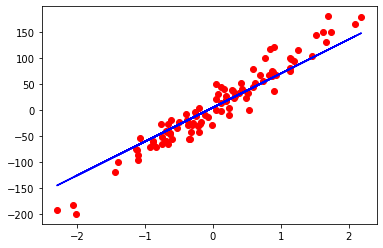

In [9]:
#1) Design model (input, output size, forward pass)
#2) Construct loss and optimizer
#3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape
# 1)model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

# 2)loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
     
#plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy, 'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()